In [7]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

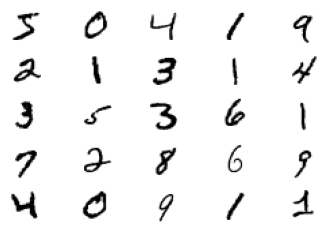

In [3]:
for i in range(25):
    plt.subplot(5, 5, 1+i)
    plt.axis("off")
    plt.imshow(X_train[i], cmap="gray_r")

In [ ]:
def discriminator():
    model = Sequential([
        Conv2D(
            filters = 64, 
            kernel_size = (3,3), 
            strides = (2,2), 
            padding = "same", 
            input_shape = (28,28,1)
        ),
        LeakyReLU(alpha = 0.2),
        Conv2D(
            filters = 64, 
            kernel_size = (3,3), 
            strides = (2,2), 
            padding = "same"
        ),
        LeakyReLU(alpha = 0.2),
        Flatten(),
        Dense(1, activation = "sigmoid")
    ])
    optimizer = Adam(lr = 0.0002, beta_1 = 0.5)
    model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
    return model

In [4]:
discriminator = discriminator()
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3137      
Total params: 40,705
Trainable params: 40,705
Non-trainable params: 0
____________________________________________________

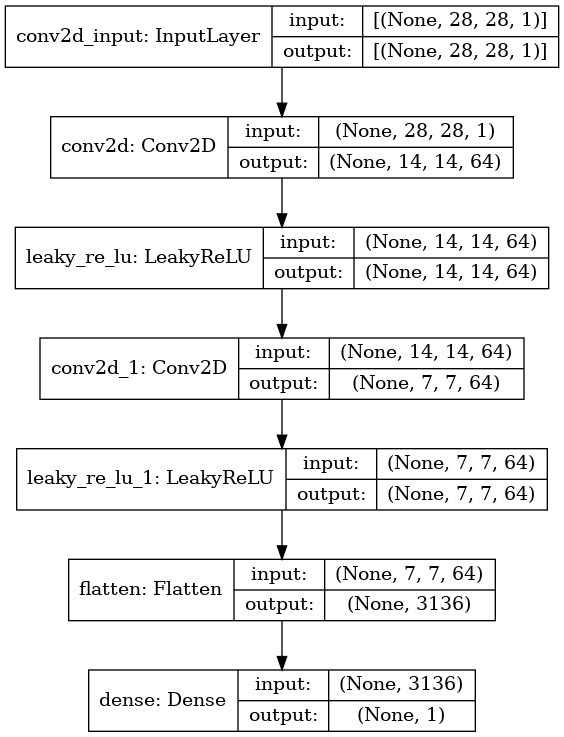

In [5]:
plot_model(discriminator, to_file = "discriminator.png", show_shapes=True, show_layer_names=True)

In [20]:
def generator(): 
    model = Sequential(
        [
            
        ]
    )

(1, 28, 28)


In [ ]:
generator = generator()
generator.summary()

In [ ]:
plot_model(generator, to_file = "generatpr.png", show_shapes=True, show_layer_names=True)

In [ ]:
def generate_fake_samples(n_samples):
    fake_images = rand(28*28*n_samples)
    # generate n images of 28x28 in gray scale
    fake_images = fake_images.reshape((n_samples, 28, 28, 1))
    labels = zeros((n_samples, 1))
    return fake_images, labels

In [ ]:
def generate_real_samples(dataset, n_samples):
    # pick n random numbers from 0 to MAX(dataset.size)
    i = randint(0, dataset.shape[0], n_samples)
    real_images = dataset[i]
    labels = ones((n_samples, 1))
    return real_images, labels

In [ ]:
def load_real_samples():
    (X_train, _), (_, _) = mnist.load_data()
    # add another dimension for image color in gray scale
    X = np.expand_dims(X_train, axis = 1)
    X = X.astype('float32')
    X = X / 255.0
    return X

In [ ]:
def train_discriminator(model, dataset, iterations = 100, n_batch = 256):
    pass